In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
test = xr.open_dataset('/data/keeling/a/xx24/d/proj_film/partmc/scenarios/1_urban_plume/out/urban_plume_0001_00000001.nc',engine='netcdf4')
test

<xarray.Dataset> Size: 754kB
Dimensions:                     (gas_species: 77, aero_species: 20,
                                 aero_source: 8, aero_weight_group: 2,
                                 aero_weight_class: 8, aero_particle: 2504,
                                 aero_removed: 1)
Coordinates:
  * gas_species                 (gas_species) int32 308B 1 2 3 4 ... 74 75 76 77
  * aero_species                (aero_species) int32 80B 1 2 3 4 ... 17 18 19 20
  * aero_source                 (aero_source) int32 32B 1 2 3 4 5 6 7 8
  * aero_weight_group           (aero_weight_group) int32 8B 1 2
  * aero_weight_class           (aero_weight_class) int32 32B 1 2 3 4 5 6 7 8
  * aero_particle               (aero_particle) int32 10kB 1 2 3 ... 2503 2504
  * aero_removed                (aero_removed) int32 4B 1
Data variables: (12/49)
    time                        float64 8B ...
    timestep                    float64 8B ...
    timestep_index              int32 4B ...
    repeat                      int32 4B ...
    temperature                 float64 8B ...
    relative_humidity           float64 8B ...
    ...                          ...
    aero_refract_core_real      (aero_particle) float64 20kB ...
    aero_refract_core_imag      (aero_particle) float64 20kB ...
    aero_core_vol               (aero_particle) float64 20kB ...
    aero_removed_id             (aero_removed) int32 4B ...
    aero_removed_action         (aero_removed) int32 4B ...
    aero_removed_other_id       (aero_removed) int32 4B ...
Attributes:
    title:        PartMC version 2.7.0 output file
    source:       PartMC version 2.7.0
    UUID:         A407D9CF-A442-4FCA-89B3-8B8B65343619
    history:      2024-02-25T15:10:10.358-06:00 created by PartMC version 2.7.0
    Conventions:  CF-1.4

In [3]:
time = np.zeros(25)
gas_mixing_ratio = np.zeros((25, 77))
directory_ori = '/data/keeling/a/xx24/d/proj_film/partmc/scenarios/1_urban_plume/out/'

for subdir, dirs, files in os.walk(directory_ori):
    for file in files:
        filename = os.path.join(subdir, file)
        if ("urban_plume_0001" in filename) and (".nc" in filename):
            print(filename[-5:-3])
            i = int(filename[-5:-3])
            with xr.open_dataset(filename) as ds:
                gas_mixing_ratio[i-1, :] = ds["gas_mixing_ratio"].values
                time[i-1] = ds["time"].values / 3600

14
03
02
15
17
01
16
05
12
13
04
06
11
10
07
19
21
20
18
22
23
08
09
24
25


In [15]:
# 0	H2SO4
# 1	HNO3
# 2	HCl
# 3	NH3
# 4	NO
# 5	NO2
# 6	NO3
# 7	N2O5
# 8	HONO
# 9	HNO4
# 10	O3
# 11	O1D
# 12	O3P
# 13	OH
# 14	HO2
# 15	H2O2
# 16	CO
# 17	SO2
# 18	CH4
# 19	C2H6
# 20	CH3O2
# 21	ETHP
# 22	HCHO
# 23	CH3OH
# 24	ANOL
# 25	CH3OOH
# 26	ETHOOH
# 27	ALD2
# 28	HCOOH
# 29	RCOOH
# 30	C2O3
# 31	PAN
# 32	ARO1
# 33	ARO2
# 34	ALK1
# 35	OLE1
# 36	API1
# 37	API2
# 38	LIM1
# 39	LIM2
# 40	PAR
# 41	AONE
# 42	MGLY
# 43	ETH
# 44	OLET
# 45	OLEI
# 46	TOL
# 47	XYL
# 48	CRES
# 49	TO2
# 50	CRO
# 51	OPEN
# 52	ONIT
# 53	ROOH
# 54	RO2
# 55	ANO2
# 56	NAP
# 57	XO2
# 58	XPAR
# 59	ISOP
# 60	ISOPRD
# 61	ISOPP
# 62	ISOPN
# 63	ISOPO2
# 64	API
# 65	LIM
# 66	DMS
# 67	MSA
# 68	DMSO
# 69	DMSO2
# 70	CH3SO2H
# 71	CH3SCH2OO
# 72	CH3SO2
# 73	CH3SO3
# 74	CH3SO2OO
# 75	CH3SO2CH2OO
# 76	SULFHOX

Text(0.5, 0, 'Time (h)')

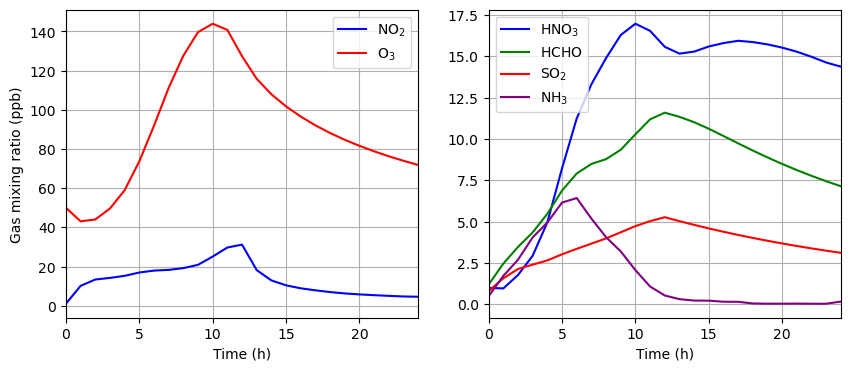

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10, 4), sharex=True)
ax[0].plot(gas_mixing_ratio[:,5], color='blue', label=r'$\rm NO_2$')
ax[0].plot(gas_mixing_ratio[:,10], color='red', label=r'$\rm O_3$')

ax[1].plot(time, gas_mixing_ratio[:,1], label=r'$\rm HNO_3$', color='blue')    # HNO3 at index 1
ax[1].plot(time, gas_mixing_ratio[:,22], label=r'$\rm HCHO$', color='green')    # HCHO at index 22
ax[1].plot(time, gas_mixing_ratio[:,17], label=r'$\rm SO_2$', color='red')       # SO2 at index 17
ax[1].plot(time, gas_mixing_ratio[:,3], label=r'$\rm NH_3$', color='purple')     # NH3 at index 3

ax[0].set_xlim(0,24)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel('Gas mixing ratio (ppb)')
ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('Time (h)')
ax[1].set_xlabel('Time (h)')

In [4]:
aero_file = xr.open_dataset('/data/keeling/a/xx24/d/proj_film/partmc/scenarios/1_urban_plume/out/urban_plume_process.nc',engine='netcdf4')
aero_file

<xarray.Dataset> Size: 11kB
Dimensions:                       (time: 25)
Coordinates:
  * time                          (time) float64 200B 0.0 3.6e+03 ... 8.64e+04
Data variables: (12/54)
    tot_num_conc                  (time) float64 200B ...
    tot_num_conc_ci_offset        (time) float64 200B ...
    tot_mass_conc                 (time) float64 200B ...
    tot_mass_conc_ci_offset       (time) float64 200B ...
    tot_dry_mass_conc             (time) float64 200B ...
    tot_dry_mass_conc_ci_offset   (time) float64 200B ...
    ...                            ...
    d_alpha                       (time) float64 200B ...
    d_alpha_ci_offset             (time) float64 200B ...
    d_gamma                       (time) float64 200B ...
    d_gamma_ci_offset             (time) float64 200B ...
    chi                           (time) float64 200B ...
    chi_ci_offset                 (time) float64 200B ...
Attributes:
    title:        1_urban_plume process output file
    source:       1_urban_plume process
    UUID:         A407D9CF-A442-4FCA-89B3-8B8B65343619
    history:      2025-04-07T21:13:58.589-05:00 created by 1_urban_plume process
    Conventions:  CF-1.4

In [5]:
tot_bc_mass = aero_file['tot_bc_mass_conc'].values
tot_oc_mass = aero_file['tot_oc_mass_conc'].values
tot_soa_mass = aero_file['tot_soa_mass_conc'].values
tot_no3_mass = aero_file['tot_no3_mass_conc'].values
tot_nh4_mass = aero_file['tot_nh4_mass_conc'].values
tot_so4_mass = aero_file['tot_so4_mass_conc'].values

Text(0.5, 0, 'Time (h)')

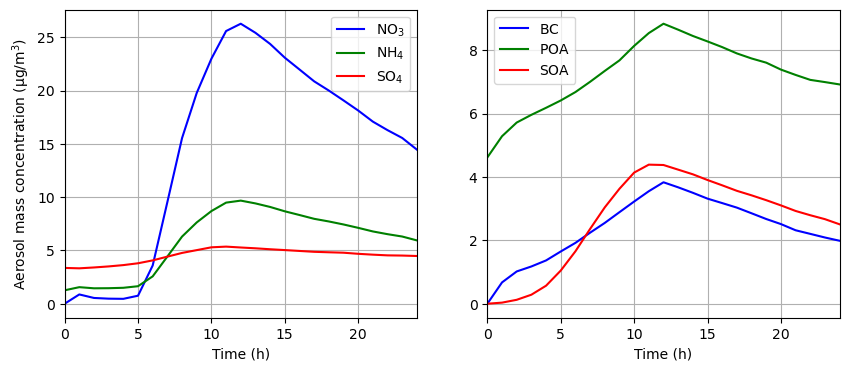

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10, 4), sharex=True)
ax[0].plot(time, tot_no3_mass*1e9, label=r'$\rm NO_3$', color='blue')
ax[0].plot(time, tot_nh4_mass*1e9, label=r'$\rm NH_4$', color='green')
ax[0].plot(time, tot_so4_mass*1e9, label=r'$\rm SO_4$', color='red')

ax[1].plot(time, tot_bc_mass*1e9, label=r'$\rm BC$', color='blue')    
ax[1].plot(time, tot_oc_mass*1e9, label=r'$\rm POA$', color='green')    
ax[1].plot(time, tot_soa_mass*1e9, label=r'$\rm SOA$', color='red')       

ax[0].set_xlim(0,24)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'Aerosol mass concentration ($\rm \mu g/m^3$)')
ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('Time (h)')
ax[1].set_xlabel('Time (h)')